# Paquetes

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

2022-09-25 12:41:14.785753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-25 12:41:14.895479: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-25 12:41:14.895497: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-25 12:41:14.920493: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-25 12:41:15.395892: W tensorflow/stream_executor/platform/de

# Visualizacion previa de datos

In [2]:
path = os.getcwd()

In [3]:
c_df = pd.read_csv(os.path.join(path, 'Datos', 'Data_Coyhaique.csv'), index_col = [0])
c_df = c_df.set_index(pd.to_datetime(c_df.index))

In [4]:
c_df.isna().sum()/len(c_df)*100

Presion        0.264085
Temperatura    0.310544
HR             0.308099
RapViento      0.408353
O3             8.514280
CO             8.560739
PM25           1.978189
PM10           1.672535
SO2            2.616393
DoY            0.000000
DoW            0.000000
dtype: float64

In [5]:
c_df = c_df.fillna(value = c_df.mean())

In [6]:
c_df_mean = c_df.resample('D',kind = 'timestamp').mean()

In [7]:
c_df_mean

,Presion,Temperatura,HR,RapViento,O3,CO,PM25,PM10,SO2,DoY,DoW
2018-01-01,969.583333,9.612501,67.875000,4.754167,11.375849,0.796953,11.583333,16.000000,2.342500,1.0,1.0
2018-01-02,964.333333,12.633333,67.291667,4.462500,11.375849,0.796953,8.875000,12.666667,2.283333,2.0,2.0
2018-01-03,956.333333,11.683333,64.875000,4.008333,11.375849,0.796953,11.750000,17.041667,2.405000,3.0,3.0
2018-01-04,956.958333,8.708333,69.166667,3.712500,11.375849,0.796953,15.449413,20.952188,2.277917,4.0,4.0
2018-01-05,970.916667,10.137500,60.666667,5.525000,11.375849,0.796953,9.833333,17.125000,1.572500,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,981.298417,3.674328,58.290054,4.231699,12.083333,0.773333,37.083333,38.250000,1.594583,239.0,6.0
2022-08-28,983.387333,4.749944,61.044546,1.321621,10.208333,1.049583,59.291667,60.541667,1.615417,240.0,7.0
2022-08-29,973.471458,4.198099,59.810979,0.878979,5.083333,1.662083,100.125000,104.375000,2.050417,241.0,1.0
2022-08-30,972.757625,7.101256,68.694246,1.392455,8.250000,0.639167,27.416667,29.791667,1.762917,242.0,2.0


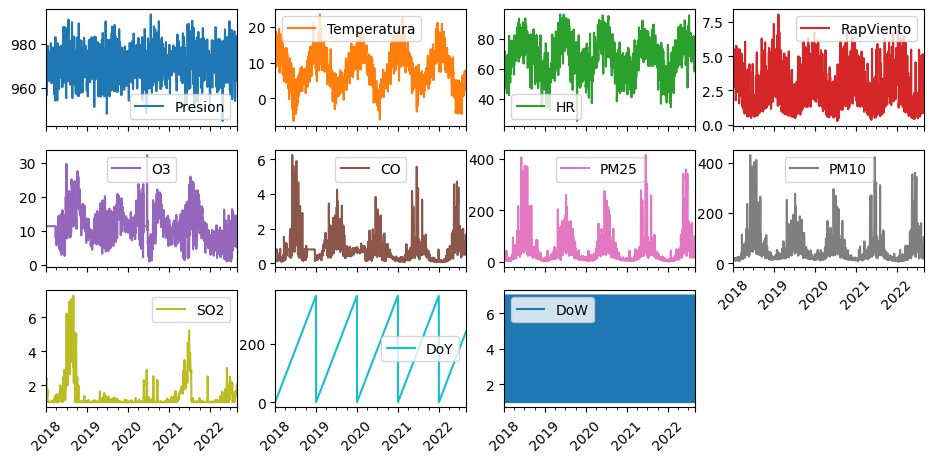

In [8]:
c_df_mean.plot(subplots = True, layout = (4,4), figsize = (7*(1+np.sqrt(5))/2,7), rot=45);

# Separación de datos

In [9]:
df_predictores = c_df_mean
df_predictores

,Presion,Temperatura,HR,RapViento,O3,CO,PM25,PM10,SO2,DoY,DoW
2018-01-01,969.583333,9.612501,67.875000,4.754167,11.375849,0.796953,11.583333,16.000000,2.342500,1.0,1.0
2018-01-02,964.333333,12.633333,67.291667,4.462500,11.375849,0.796953,8.875000,12.666667,2.283333,2.0,2.0
2018-01-03,956.333333,11.683333,64.875000,4.008333,11.375849,0.796953,11.750000,17.041667,2.405000,3.0,3.0
2018-01-04,956.958333,8.708333,69.166667,3.712500,11.375849,0.796953,15.449413,20.952188,2.277917,4.0,4.0
2018-01-05,970.916667,10.137500,60.666667,5.525000,11.375849,0.796953,9.833333,17.125000,1.572500,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,981.298417,3.674328,58.290054,4.231699,12.083333,0.773333,37.083333,38.250000,1.594583,239.0,6.0
2022-08-28,983.387333,4.749944,61.044546,1.321621,10.208333,1.049583,59.291667,60.541667,1.615417,240.0,7.0
2022-08-29,973.471458,4.198099,59.810979,0.878979,5.083333,1.662083,100.125000,104.375000,2.050417,241.0,1.0
2022-08-30,972.757625,7.101256,68.694246,1.392455,8.250000,0.639167,27.416667,29.791667,1.762917,242.0,2.0


In [10]:
df_target = c_df_mean['PM25']
df_target = df_target.shift(-1)

In [11]:
df_target.drop(df_target.index[-1], inplace = True)
df_predictores.drop(c_df_mean.index[-1], inplace = True)

In [12]:
df_target

2018-01-01      8.875000
2018-01-02     11.750000
2018-01-03     15.449413
2018-01-04      9.833333
2018-01-05      9.916667
                 ...    
2022-08-26     37.083333
2022-08-27     59.291667
2022-08-28    100.125000
2022-08-29     27.416667
2022-08-30     29.958333
Freq: D, Name: PM25, Length: 1703, dtype: float64

In [13]:
df_ml_predictores = df_predictores.loc['2018':'2021']
df_ml_target = df_target.loc['2018':'2021']

In [14]:
df_2022_predictores = df_predictores.loc['2022-01-01':'2022-08-30']
df_2022_target = df_target.loc['2022-01-01':'2022-08-30']

## Entrenamiento y Validación

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_predictores, df_ml_target, test_size = 0.30, random_state = 42)

# Feed Forward Neural Network

## 1.- Arquitectura

In [16]:
model_ffnn = tf.keras.models.Sequential()


model_ffnn.add(tf.keras.layers.Dense(50, activation = tf.keras.activations.relu))
model_ffnn.add(tf.keras.layers.Dense(120, activation = tf.keras.activations.relu))
model_ffnn.add(tf.keras.layers.Dense(50, activation = tf.keras.activations.relu))

model_ffnn.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

model_ffnn.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                   metrics = ['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'])

input_shape = X_train.shape
model_ffnn.build(input_shape)

model_ffnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1022, 50)                600       
                                                                 
 dense_1 (Dense)             (1022, 120)               6120      
                                                                 
 dense_2 (Dense)             (1022, 50)                6050      
                                                                 
 dense_3 (Dense)             (1022, 1)                 51        
                                                                 
Total params: 12,821
Trainable params: 12,821
Non-trainable params: 0
_________________________________________________________________


2022-09-25 12:41:17.228910: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 12:41:17.229116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-25 12:41:17.229152: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-25 12:41:17.229183: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-25 12:41:17.229213: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

## 2.- Entrenamiento

In [17]:
fnnn_fit = model_ffnn.fit(X_train, y_train, epochs = 250, batch_size = 100,verbose = 0)

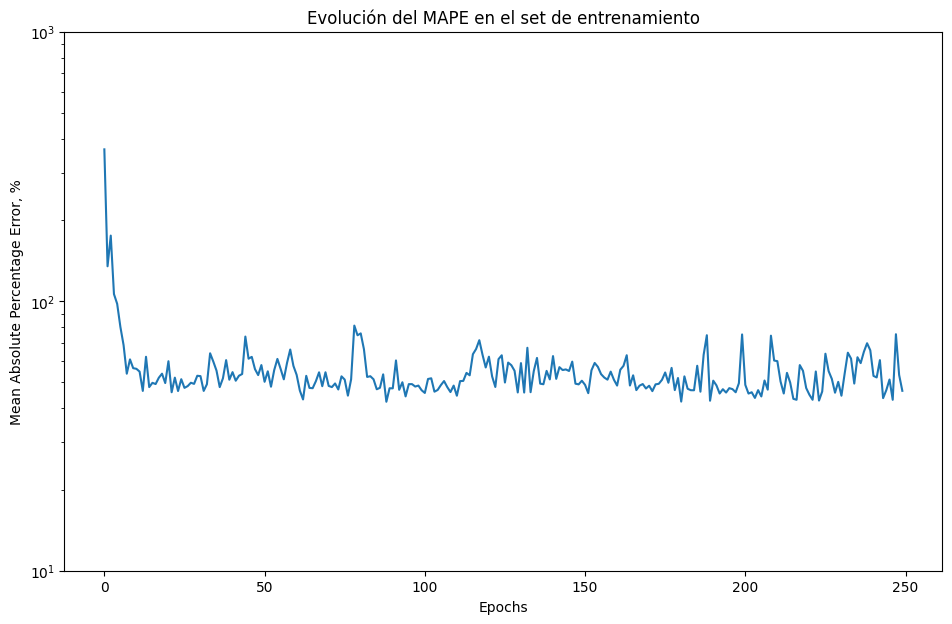

In [18]:
fig = plt.figure(figsize = (7*(1+np.sqrt(5))/2,7))
plt.plot(fnnn_fit.history['mean_absolute_percentage_error'])
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error, %')
plt.title('Evolución del MAPE en el set de entrenamiento')
plt.yscale('log')
plt.ylim([10**1,10**3])
plt.show()

## 3.- Evaluación

In [19]:
loss, mae, mse, mape = model_ffnn.evaluate(X_test,y_test)

14/14 [==============================] - 0s 1ms/step - loss: 963.2090 - mean_absolute_error: 16.3915 - mean_squared_error: 963.2090 - mean_absolute_percentage_error: 43.6632


## 4.- Predicción

In [20]:
pred_2022_FFNN = model_ffnn.predict(df_2022_predictores)

8/8 [==============================] - 0s 1ms/step


# Long-Short Term Memory

## 0.- Preprocesamiento LSTM

<img src= "Datos/time_series.png">

In [21]:
def rshp_features_lstm(features, n_steps):
  ini_batch = features.shape[0]
  n_features = features.shape[1]
  array_lstm = np.zeros((ini_batch, n_steps, n_features)) 
  for i in range(n_features):
    for j in range(n_steps):
      array_lstm[:,j,i] = np.roll(features.iloc[:,i],-j)

  array_lstm = np.delete(array_lstm, range(n_steps -1 ), axis = 0)
  return array_lstm

In [22]:
n_steps = 5

predictores_lstm = rshp_features_lstm(df_ml_predictores,n_steps)

target_lstm = df_ml_target.drop(df_ml_target.index[0:n_steps-1])

X_lstm_2022 = rshp_features_lstm(df_2022_predictores, n_steps)

In [23]:
X_train_lstm, X_test_lstm, Y_train_lstm, Y_test_lstm = train_test_split(predictores_lstm, target_lstm.values, test_size = 0.30, random_state = 42)

## 1.- Arquitectura

In [24]:
model_LSTM = tf.keras.models.Sequential()

model_LSTM.add(tf.keras.layers.LSTM(50,input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2]), activation = tf.keras.activations.relu))

model_LSTM.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

model_LSTM.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                   metrics = ['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'])

model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________


## 2.- Entrenamiento

In [25]:
lstm_fit = model_LSTM.fit(X_train_lstm, Y_train_lstm, epochs = 250, batch_size = 100,verbose = 0)

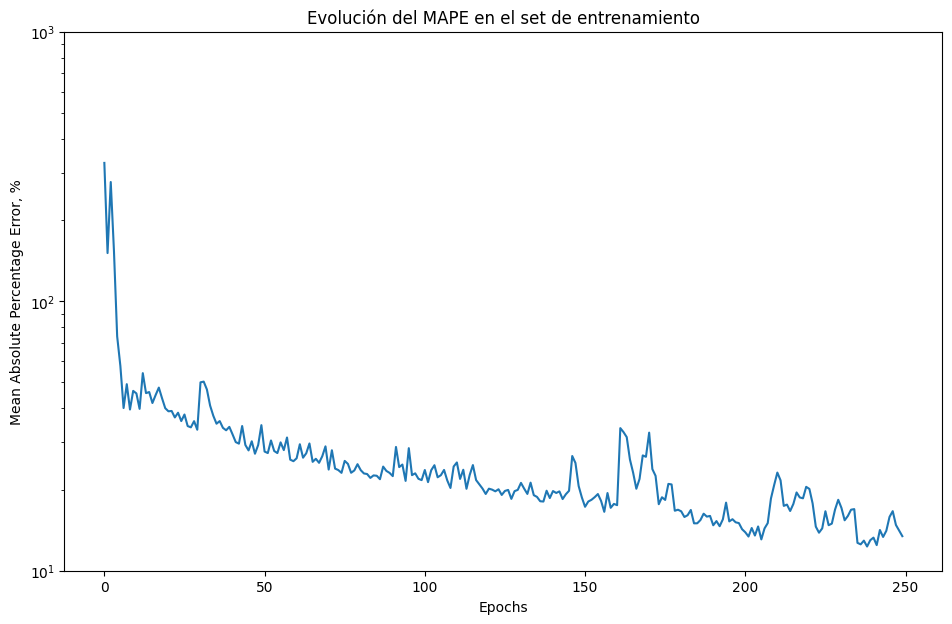

In [26]:
fig = plt.figure(figsize = (7*(1+np.sqrt(5))/2,7))
plt.plot(lstm_fit.history['mean_absolute_percentage_error'])
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error, %')
plt.title('Evolución del MAPE en el set de entrenamiento')
plt.yscale('log')
plt.ylim([10**1,10**3])
plt.show()

In [27]:
lstm_fit.history['mean_absolute_percentage_error'][-1]

13.434611320495605

## 3.- Evaluación

In [28]:
loss, mae, mse, mape = model_LSTM.evaluate(X_test_lstm,Y_test_lstm)

14/14 [==============================] - 0s 2ms/step - loss: 19.4731 - mean_absolute_error: 2.8012 - mean_squared_error: 19.4731 - mean_absolute_percentage_error: 14.1323


## 4.- Predicción

In [29]:
pred_2022_LSTM = model_LSTM.predict(X_lstm_2022)

8/8 [==============================] - 0s 2ms/step


# Comparación de modelos

In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
df_2022_LR = reg.predict(df_2022_predictores) 

In [31]:
# # df_2022_target, pred_2022_FFNN, pred_2022_LSTM
# font = {'family': 'serif',
#         'color':  'red',
#         'weight': 'normal',
#         'size': 16,
#         'alpha': 0.3
#         }

# fig = plt.figure(figsize = (7*(1+np.sqrt(5))/2,7))

# plt.axhline(y = 0, color = 'k', linestyle = '-',linewidth = 1)
# plt.axhline(y = 50, color = 'r', linestyle = '-', alpha = 0.3)
# plt.axhline(y = 80, color = 'r', linestyle = '-', alpha = 0.3)
# plt.axhline(y = 110, color = 'r', linestyle = '-', alpha = 0.3)
# plt.axhline(y = 170, color = 'r', linestyle = '-', alpha = 0.3)


# plt.plot(df_2022_target, '-k', label = r'Medición')
# plt.plot(df_2022_target.index[1::],pred_2022_FFNN[0:-1], '-c', label = r'FFNN')
# plt.plot(df_2022_target.index[4::],pred_2022_LSTM, '-.m', label = r'LSTM')
# plt.plot(df_2022_target.index[1::],df_2022_LR[0:-1], '--y', label = r'LR')

# plt.legend()

# plt.text(df_2022_target.index[0], 50, r'Regular', font)
# plt.text(df_2022_target.index[0], 80, r'Alerta', font)
# plt.text(df_2022_target.index[0], 110, r'Pre-emergencia', font)
# plt.text(df_2022_target.index[0], 170, r'Emergencia', font)

# #plt.xticks(range(len(df_2022_target.index)),df_2022_target.index)
# plt.title(r'Comparación de Predicciones')
# plt.xlabel(r'Fechas')
# plt.ylabel(r'Concentración de PM2.5, $\mu g/m³$')

# plt.show()

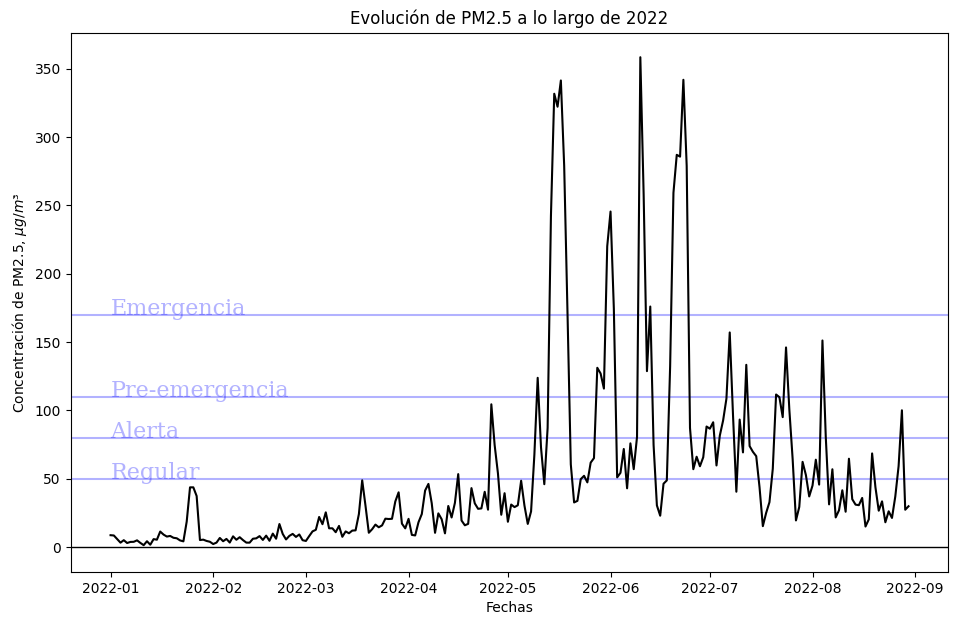

In [32]:
# df_2022_target, pred_2022_FFNN, pred_2022_LSTM
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        'alpha': 0.3
        }

fig = plt.figure(figsize = (7*(1+np.sqrt(5))/2,7))

plt.axhline(y = 0, color = 'k', linestyle = '-',linewidth = 1)
plt.axhline(y = 50, color = 'b', linestyle = '-', alpha = 0.3)
plt.axhline(y = 80, color = 'b', linestyle = '-', alpha = 0.3)
plt.axhline(y = 110, color = 'b', linestyle = '-', alpha = 0.3)
plt.axhline(y = 170, color = 'b', linestyle = '-', alpha = 0.3)

plt.plot(df_2022_target, '-k', label = r'Medición')

#plt.legend()

plt.text(df_2022_target.index[0], 50, r'Regular', font)
plt.text(df_2022_target.index[0], 80, r'Alerta', font)
plt.text(df_2022_target.index[0], 110, r'Pre-emergencia', font)
plt.text(df_2022_target.index[0], 170, r'Emergencia', font)


#plt.xticks(range(len(df_2022_target.index)),df_2022_target.index)
plt.title(r'Evolución de PM2.5 a lo largo de 2022')
plt.xlabel(r'Fechas')
plt.ylabel(r'Concentración de PM2.5, $\mu g/m³$')
#fig.text(0.04, 0.5, r'Concentración de PM2.5, $\mu g/m³$', va='center', rotation='vertical')
plt.show()

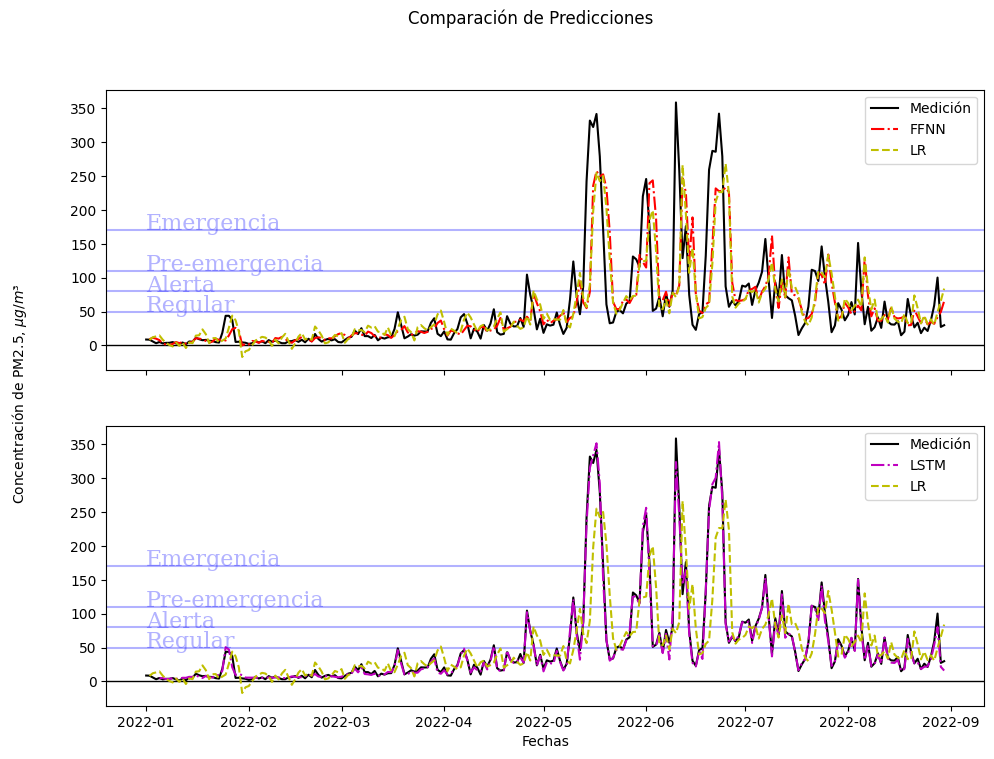

In [33]:
# df_2022_target, pred_2022_FFNN, pred_2022_LSTM
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        'alpha': 0.3
        }

fig, axs = plt.subplots(2,1,figsize = (7*(1+np.sqrt(5))/2,8), sharex = True, sharey = True)

axs[0].axhline(y = 0, color = 'k', linestyle = '-',linewidth = 1)
axs[0].axhline(y = 50, color = 'b', linestyle = '-', alpha = 0.3)
axs[0].axhline(y = 80, color = 'b', linestyle = '-', alpha = 0.3)
axs[0].axhline(y = 110, color = 'b', linestyle = '-', alpha = 0.3)
axs[0].axhline(y = 170, color = 'b', linestyle = '-', alpha = 0.3)

axs[0].plot(df_2022_target, '-k', label = r'Medición')
axs[0].plot(df_2022_target.index[1::],pred_2022_FFNN[0:-1], '-.r', label = r'FFNN')
#axs[0].plot(df_2022_target.index[4::],pred_2022_LSTM, '-.m', label = r'LSTM')
axs[0].plot(df_2022_target.index[1::],df_2022_LR[0:-1], '--y', label = r'LR')

axs[0].legend()

axs[0].text(df_2022_target.index[0], 50, r'Regular', font)
axs[0].text(df_2022_target.index[0], 80, r'Alerta', font)
axs[0].text(df_2022_target.index[0], 110, r'Pre-emergencia', font)
axs[0].text(df_2022_target.index[0], 170, r'Emergencia', font)

axs[1].axhline(y = 0, color = 'k', linestyle = '-',linewidth = 1)
axs[1].axhline(y = 50, color = 'b', linestyle = '-', alpha = 0.3)
axs[1].axhline(y = 80, color = 'b', linestyle = '-', alpha = 0.3)
axs[1].axhline(y = 110, color = 'b', linestyle = '-', alpha = 0.3)
axs[1].axhline(y = 170, color = 'b', linestyle = '-', alpha = 0.3)

axs[1].plot(df_2022_target, '-k', label = r'Medición')
#axs[1].plot(df_2022_target.index[1::],pred_2022_FFNN[0:-1], '-c', label = r'FFNN')
axs[1].plot(df_2022_target.index[(n_steps-1)::],pred_2022_LSTM, '-.m', label = r'LSTM')
axs[1].plot(df_2022_target.index[1::],df_2022_LR[0:-1], '--y', label = r'LR')

axs[1].legend()

axs[1].text(df_2022_target.index[0], 50, r'Regular', font)
axs[1].text(df_2022_target.index[0], 80, r'Alerta', font)
axs[1].text(df_2022_target.index[0], 110, r'Pre-emergencia', font)
axs[1].text(df_2022_target.index[0], 170, r'Emergencia', font)

#plt.xticks(range(len(df_2022_target.index)),df_2022_target.index)
plt.suptitle(r'Comparación de Predicciones')
plt.xlabel(r'Fechas')
#plt.ylabel(r'Concentración de PM2.5, $\mu g/m³$')
fig.text(0.04, 0.5, r'Concentración de PM2.5, $\mu g/m³$', va='center', rotation='vertical')
plt.show()

In [34]:
# AGREGAR CODIGO PARA CONTEO DE ERRORES

In [35]:
eval_modelos = {'FFNN':np.zeros((1,5)),
                'LSTM':np.zeros((1,5)),
                'LR':np.zeros((1,5))}
for medicion, FFNN, LSTM, LR in zip(df_2022_target.values[4::], pred_2022_FFNN[3:-1], pred_2022_LSTM, df_2022_LR[0:-1]):
    # Bueno
    if medicion < 50 and not(FFNN < 50):
        eval_modelos['FFNN'][0][0] = eval_modelos['FFNN'][0][0] + 1
    if medicion < 50 and not(LSTM < 50):
        eval_modelos['LSTM'][0][0] = eval_modelos['LSTM'][0][0] + 1 
    if medicion < 50 and not(LR < 50):
        eval_modelos['LR'][0][0] = eval_modelos['LR'][0][0] + 1 
    # Regular
    if medicion > 50 and medicion < 80 and not(FFNN > 50 and FFNN < 80):
        eval_modelos['FFNN'][0][1] = eval_modelos['FFNN'][0][1] + 1
    if medicion > 50 and medicion < 80 and not(LSTM > 50 and LSTM < 80):
        eval_modelos['LSTM'][0][1] = eval_modelos['LSTM'][0][1] + 1
    if medicion > 50 and medicion < 80 and not(LR > 50 and LR < 80):
        eval_modelos['LR'][0][1] = eval_modelos['LR'][0][1] + 1
    # Alerta
    if medicion > 80 and medicion < 110 and not(FFNN > 80 and FFNN < 110):
        eval_modelos['FFNN'][0][2] = eval_modelos['FFNN'][0][2] + 1
    if medicion > 80 and medicion < 110 and not(LSTM > 80 and LSTM < 110):
        eval_modelos['LSTM'][0][2] = eval_modelos['LSTM'][0][2] + 1
    if medicion > 80 and medicion < 110 and not(LR > 80 and LR < 110):
        eval_modelos['LR'][0][2] = eval_modelos['LR'][0][2] + 1
    # Pre-emergencia
    if medicion > 110 and medicion < 170 and not(FFNN > 110 and FFNN < 170):
        eval_modelos['FFNN'][0][3] = eval_modelos['FFNN'][0][3] + 1
    if medicion > 110 and medicion < 170 and not(LSTM > 110 and LSTM < 170):
        eval_modelos['LSTM'][0][3] = eval_modelos['LSTM'][0][3] + 1
    if medicion > 110 and medicion < 170 and not(LR > 110 and LR < 170):
        eval_modelos['LR'][0][3] = eval_modelos['LR'][0][3] + 1
    # Emergencia
    if medicion > 170 and not(FFNN > 110):
        eval_modelos['FFNN'][0][4] = eval_modelos['FFNN'][0][4] + 1
    if medicion > 170 and not(LSTM > 170):
        eval_modelos['LSTM'][0][4] = eval_modelos['LSTM'][0][4] + 1  
    if medicion > 170 and not(LR > 170):
        eval_modelos['LR'][0][4] = eval_modelos['LR'][0][4] + 1  

In [36]:
eval_modelos

{'FFNN': array([[25., 19., 11., 10.,  5.]]),
 'LSTM': array([[1., 2., 1., 0., 3.]]),
 'LR': array([[30., 26., 15., 10., 16.]])}